In [8]:
from elasticsearch import Elasticsearch
from pprint import pprint

es = Elasticsearch("http://localhost:9200/")
client_info = es.info()
pprint(client_info.body)

{'cluster_name': 'docker-cluster',
 'cluster_uuid': 'S88XwI8mTkSFeJBJ4J532w',
 'name': 'c0d7ef8c0833',
 'tagline': 'You Know, for Search',
 'version': {'build_date': '2024-08-05T10:05:34.233336849Z',
             'build_flavor': 'default',
             'build_hash': '1a77947f34deddb41af25e6f0ddb8e830159c179',
             'build_snapshot': False,
             'build_type': 'docker',
             'lucene_version': '9.11.1',
             'minimum_index_compatibility_version': '7.0.0',
             'minimum_wire_compatibility_version': '7.17.0',
             'number': '8.15.0'}}


In [9]:
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index",
                  settings={
                      "index":{
                      "number_of_shards": 3,
                      "number_of_replicas": 2
                      }
                  })

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [10]:
documents = {
    'title':'title',
    'text':'text',
    'created_on':'2024-09-22'
}

response = es.index(index="my_index",document=documents)
response

ObjectApiResponse({'_index': 'my_index', '_id': 'Nb7B4pMBXS9W6nXoS0EL', '_version': 1, 'result': 'created', '_shards': {'total': 3, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [11]:
dummy_data = [
  {
    "title": "Sample Title 1",
    "text": "This is the first sample document text.",
    "created_on": "2024-09-22"
  },
  {
    "title": "Sample Title 2",
    "text": "Here is another example of a document.",
    "created_on": "2024-09-24"
  },
  {
    "title": "Sample Title 3",
    "text": "The content of the third document goes here.",
    "created_on": "2024-09-24"
  }
]

In [12]:
def insert_document(document):
    response = es.index(index="my_index",document=documents)
    return response

def print_info(response):
    print(f"""Document ID: {response['_id']} is {
        response['result']} and is split into {response['_shards']['total']} shards""")
    
for document in dummy_data:
    response = insert_document(document)
    print_info(response)

Document ID: Nr7B4pMBXS9W6nXoS0F9 is created and is split into 3 shards
Document ID: N77B4pMBXS9W6nXoS0GN is created and is split into 3 shards
Document ID: OL7B4pMBXS9W6nXoS0Gd is created and is split into 3 shards


In [13]:
index_mapping = es.indices.get_mapping(index="my_index")
pprint(index_mapping)

ObjectApiResponse({'my_index': {'mappings': {'properties': {'created_on': {'type': 'date'}, 'text': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'title': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}}}}})


In [14]:
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index")

mapping = {
    'properties': {
        'created_on': {'type': 'date'},
        'text': {
            'type': 'text',
            'fields': {
                'keyword': {
                    'type': 'keyword',
                    'ignore_above': 256
                }
            }
        },
        'title': {
            'type': 'text',
            'fields': {
                'keyword': {
                    'type': 'keyword',
                    'ignore_above': 256
                }
            }
        }
    }
}

es.indices.put_mapping(index="my_index",body=mapping)
index_mapping = es.indices.get_mapping(index="my_index")
pprint(index_mapping["my_index"]["mappings"]["properties"])

{'created_on': {'type': 'date'},
 'text': {'fields': {'keyword': {'ignore_above': 256, 'type': 'keyword'}},
          'type': 'text'},
 'title': {'fields': {'keyword': {'ignore_above': 256, 'type': 'keyword'}},
           'type': 'text'}}


In [15]:
es.indices.delete(index='other_common_data_types_index',
                  ignore_unavailable=True)
es.indices.create(
    index='other_common_data_types_index',
    mappings={
        "properties": {
            "book_reference": {
                "type": "keyword"
            },
            "price": {
                "type": "float"
            },
            "publish_date": {
                "type": "date"
            },
            "is_available": {
                "type": "boolean"
            },
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'other_common_data_types_index'})

In [16]:
document = {
    "book_reference": "978-1617294433",
    "price": 44.99,
    "publish_date": "2021-06-30",
    "is_available": True
}
response = es.index(index='other_common_data_types_index', body=document)
response

ObjectApiResponse({'_index': 'other_common_data_types_index', '_id': 'Ob7B4pMBXS9W6nXoTUHQ', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [17]:
es.indices.delete(index='object_index', ignore_unavailable=True)
es.indices.create(
    index='object_index',
    mappings={
        "properties": {
            "author": {
                "properties": {
                    "first_name": {
                        "type": "text"
                    },
                    "last_name": {
                        "type": "text"
                    }
                }
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'object_index'})

In [18]:
document = {
    "author": {
        "first_name": "Imad",
        "last_name": "Saddik"
    }
}
response = es.index(index='object_index', body=document)
response

ObjectApiResponse({'_index': 'object_index', '_id': 'Or7B4pMBXS9W6nXoTkH7', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [19]:
es.indices.delete(index='flattened_object_index', ignore_unavailable=True)
es.indices.create(
    index='flattened_object_index',
    mappings={
        "properties": {
            "author": {
                "type": "flattened"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'flattened_object_index'})

In [20]:
document = {
    "author": {
        "first_name": "Imad",
        "last_name": "Saddik"
    }
}
response = es.index(index='flattened_object_index', body=document)
response

ObjectApiResponse({'_index': 'flattened_object_index', '_id': 'O77B4pMBXS9W6nXoUEET', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [21]:
es.indices.delete(index='nested_object_index', ignore_unavailable=True)
es.indices.create(
    index='nested_object_index',
    mappings={
        "properties": {
            "user": {
                "type": "nested",
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'nested_object_index'})

In [22]:
documents = [
    {
        "first": "John",
        "last": "Smith"
    },
    {
        "first": "Imad",
        "last": "Saddik"
    }
]
response = es.index(index='nested_object_index', body={"user": documents})
response

ObjectApiResponse({'_index': 'nested_object_index', '_id': 'PL7B4pMBXS9W6nXoUUEj', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [23]:
es.indices.delete(index='text_index', ignore_unavailable=True)
es.indices.create(
    index='text_index',
    mappings={
        "properties": {
            "email_body": {
                "type": "text"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_index'})

In [24]:
document = {
    "email_body": "Hello, this is a test email."
}
response = es.index(index='text_index', body=document)
response

ObjectApiResponse({'_index': 'text_index', '_id': 'Pb7B4pMBXS9W6nXoUkFf', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [25]:
es.indices.delete(index='text_completion_index', ignore_unavailable=True)
es.indices.create(
    index='text_completion_index',
    mappings={
        "properties": {
            "suggest": {
                "type": "completion"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_completion_index'})

In [26]:
document_1 = {
    "suggest": {
        "input": ["Mars", "Planet"]
    }
}

document_2 = {
    "suggest": {
        "input": ["Andromeda", "Galaxy"]
    }
}

es.index(index='text_completion_index', body=document_1)
es.index(index='text_completion_index', body=document_2)

ObjectApiResponse({'_index': 'text_completion_index', '_id': 'P77B4pMBXS9W6nXoU0F2', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

In [27]:
es.indices.delete(index='geo_point_index', ignore_unavailable=True)
es.indices.create(
    index='geo_point_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_point_index'})

In [28]:
document = {
    "text": "Geopoint as an object using GeoJSON format",
    "location": {
        "type": "Point",
        "coordinates": [
            -71.34,
            41.12
        ]
    }
}
response = es.index(index='geo_point_index', body=document)
response

ObjectApiResponse({'_index': 'geo_point_index', '_id': 'QL7B4pMBXS9W6nXoVEFq', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [29]:
es.indices.delete(index='geo_shape_index', ignore_unavailable=True)
es.indices.create(
    index='geo_shape_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_shape"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_shape_index'})

In [30]:
document_1 = {
    "location": {
        "type": "LineString",
        "coordinates": [
            [
                -77.03653,
                38.897676
            ],
            [
                -77.009051,
                38.889939
            ]
        ]
    }
}
document_2 = {
    "location": {
        "type": "Polygon",
        "coordinates": [
            [
                [100, 0],
                [101, 0],
                [101, 1],
                [100, 1],
                [100, 0],
            ],
            [
                [100.2, 0.2],
                [100.8, 0.2],
                [100.8, 0.8],
                [100.2, 0.8],
                [100.2, 0.2],
            ]
        ]
    }
}

es.index(index='geo_shape_index', body=document_1)
es.index(index='geo_shape_index', body=document_2)

ObjectApiResponse({'_index': 'geo_shape_index', '_id': 'Qr7B4pMBXS9W6nXoVUG4', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

In [31]:
es.indices.delete(index='point_index', ignore_unavailable=True)
es.indices.create(
    index='point_index',
    mappings={
        "properties": {
            "location": {
                "type": "point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'point_index'})

In [32]:
document = {
    "location": {
        "type": "Point",
        "coordinates": [
            -71.34,
            41.12
        ]
    }
}

response = es.index(index='point_index', body=document)
response

ObjectApiResponse({'_index': 'point_index', '_id': 'Q77B4pMBXS9W6nXoVkHM', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [33]:
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200/")
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [34]:
import json
from tqdm import tqdm

document_ids = []
for document in tqdm(dummy_data,total=len(dummy_data)):
    response = es.index(index="my_index",document=document)
    document_ids.append(response['_id'])

100%|██████████| 3/3 [00:00<00:00, 37.04it/s]


In [35]:
# response = es.delete(index="my_index", id=document_ids[0])

In [36]:
pprint(response.body)

{'_id': 'Rr7B4pMBXS9W6nXoWEEr',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 2,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [37]:
response = es.get(index="my_index", id=document_ids[0])
pprint(response.body)

{'_id': 'RL7B4pMBXS9W6nXoV0Hi',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 0,
 '_source': {'created_on': '2024-09-22',
             'text': 'This is the first sample document text.',
             'title': 'Sample Title 1'},
 '_version': 1,
 'found': True}


In [38]:
response = es.count(index="my_index")
print(response['count'])

0


In [39]:
response

ObjectApiResponse({'count': 0, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

In [40]:
query = {
    "range": {
        "created_on": {
            "gte": "2024-09-24",
            "lte": "2024-09-24",
            "format": "yyyy-MM-dd"
        }
    }
}

response = es.count(index='my_index', query=query)
count = response["count"]

print(f"The number of documents in the index is {count}")

The number of documents in the index is 0


In [41]:
response = es.indices.exists(index="my_index")
response.body

True

In [42]:
response = es.update(
    index="my_index",
    id= document_ids[0],
    script={
        "source": "ctx._source.title = params.title",
        "params": {"title": "New Title"}
    }
)
pprint(response.body)

{'_id': 'RL7B4pMBXS9W6nXoV0Hi',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 3,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 2,
 'result': 'updated'}


In [43]:
response = es.update(
    index="my_index",
    id=document_ids[0],
    script={
        "source":"ctx._source.new_field = 'dmm'"
    }
)
pprint(response.body)

{'_id': 'RL7B4pMBXS9W6nXoV0Hi',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 4,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 3,
 'result': 'updated'}


In [44]:
response = es.get(index="my_index",id=document_ids[0])
pprint(response.body)

{'_id': 'RL7B4pMBXS9W6nXoV0Hi',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 4,
 '_source': {'created_on': '2024-09-22',
             'new_field': 'dmm',
             'text': 'This is the first sample document text.',
             'title': 'New Title'},
 '_version': 3,
 'found': True}


In [45]:
response = es.update(index="my_index",id=document_ids[0],doc={"next_field":"dmm2"})

In [46]:
response = es.get(index="my_index",id=document_ids[0])
pprint(response.body)

{'_id': 'RL7B4pMBXS9W6nXoV0Hi',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 5,
 '_source': {'created_on': '2024-09-22',
             'new_field': 'dmm',
             'next_field': 'dmm2',
             'text': 'This is the first sample document text.',
             'title': 'New Title'},
 '_version': 4,
 'found': True}


In [47]:
response = es.update(index="my_index", id=document_ids[0], script={"source":"ctx._source.remove('new_field')"})

In [48]:
response = es.get(index="my_index", id=document_ids[0])
pprint(response.body)

{'_id': 'RL7B4pMBXS9W6nXoV0Hi',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 6,
 '_source': {'created_on': '2024-09-22',
             'next_field': 'dmm2',
             'text': 'This is the first sample document text.',
             'title': 'New Title'},
 '_version': 5,
 'found': True}


In [49]:
response = es.update(
    index="my_index",
    id="1",
    doc={
        "book_id":1234,
        "book_name": "A book"
    },
    doc_as_upsert=True
)

pprint(response.body)

{'_id': '1',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 7,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [50]:
response = es.get(index="my_index", id='1')
pprint(response.body)

{'_id': '1',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 7,
 '_source': {'book_id': 1234, 'book_name': 'A book'},
 '_version': 1,
 'found': True}


In [51]:
es.count(index="my_index")

ObjectApiResponse({'count': 0, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

In [52]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [53]:
response = es.bulk(
    operations=[
        {
            "index": {
                "_index": "my_index",
                "_id": "1"
            }
        },
        # Source 1
        {
            "title": "Sample Title 1",
            "text": "This is the first sample document text.",
            "created_on": "2024-09-22"
        },
        # Action 2
        {
            "index": {
                "_index": "my_index",
                "_id": "2"
            }
        },
        # Source 2
        {
            "title": "Sample Title 2",
            "text": "Here is another example of a document.",
            "created_on": "2024-09-24"
        },
        # Action 3
        {
            "index": {
                "_index": "my_index",
                "_id": "3"
            }
        },
        # Source 3
        {
            "title": "Sample Title 3",
            "text": "The content of the third document goes here.",
            "created_on": "2024-09-24"
        },
        # Action 4
        {
            "update": {
                "_id": "1",
                "_index": "my_index"
            }
        },
        # Source 4
        {
            "doc": {
                "title": "New Title"
            }
        },
        # Action 5
        {
            "update": {
                "_id": "2",
                "_index": "my_index"
            }
        },
        # Source 5
        {
            "doc": {
                "new_field": "dummy_value"
            }
        },
        # Action 6
        {
            "delete": {
                "_index": "my_index",
                "_id": "3"
            }
        },
    ]
)

pprint(response.body)

{'errors': False,
 'items': [{'index': {'_id': '1',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': '2',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': '3',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
        

In [54]:
es.indices.delete(index="index_1", ignore_unavailable=True)
es.indices.create(index="index_1")

es.indices.delete(index="index_2", ignore_unavailable=True)
es.indices.create(index="index_2")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'index_2'})

In [55]:
for document in tqdm(dummy_data, total=len(dummy_data)):
    es.index(index="index_1",document=document)

for document in tqdm(dummy_data, total=len(dummy_data)):
    es.index(index="index_2",document=document)

100%|██████████| 3/3 [00:00<00:00, 43.36it/s]


In [56]:
response = es.search(
    index="index_1",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_1")

'Found 0 document in index_1'


In [57]:
response = es.search(
    index="index_2",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_2")

'Found 0 document in index_2'


In [58]:
response = es.search(
    index="index_1,index_2",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_1,index_2")

'Found 0 document in index_1,index_2'


In [59]:
response = es.search(
    index="index*",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_1,index_2")

'Found 1 document in index_1,index_2'


In [60]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "term": {
                "created_on":"2024-09-22"
            }
        }
    }
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 5}


In [61]:
response = es.search(
    index="my_index",
    body={"query": {"match": {"text": "document"}}}
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 7}


In [62]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "range":{
                "created_on": {
                    "lte":"2024-09-22"
                }
            }
        }
    }
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 2}


In [63]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "bool": {
                "must": [
                    {"match": {"text": "third"}},
                    {"range":{
                        "created_on":{
                            "gte":"2024-09-24",
                            "lte":"2024-09-24"
                        }
                    }}
                ]
            }
        }
    }
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 2}


In [64]:
dummy_data_2=[
    {
        "message": "This is an important keyword search result.",
        "age": 25,
        "price": 100.0
    },
    {
        "message": "Another search result with an important keyword.",
        "age": 30,
        "price": 150.0
    },
    {
        "message": "Keyword match in this result as well.",
        "age": 40,
        "price": 200.0
    },
    {
        "message": "Important keyword again in this document.",
        "age": 35,
        "price": 120.0
    },
    {
        "message": "Final document with the important keyword.",
        "age": 28,
        "price": 180.0
    }
]



In [65]:
operations = []
for document in dummy_data_2:
    operations.append({"index":{"_index":"my_index"}})
    operations.append(document)

es.bulk(operations=operations)

ObjectApiResponse({'errors': False, 'took': 1866888, 'items': [{'index': {'_index': 'my_index', '_id': 'Tb7B4pMBXS9W6nXoXkHM', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 6, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'Tr7B4pMBXS9W6nXoXkHM', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 7, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'T77B4pMBXS9W6nXoXkHM', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 8, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'UL7B4pMBXS9W6nXoXkHM', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 9, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'Ub7B4pMBXS9W6nXoXkHM', '_version': 1, 'result': 'created', '_shards': {'

In [66]:
response = es.search(
    index="my_index",
    body={"query":{
        "match_all":{}
    },
    "size":10,
    "from":10
    }
)

for hit in response['hits']['hits']:
    print(hit['_source'])

In [67]:
response = es.search(
    index="my_index",
    body={"query": {"match": {"message": "search keyword"}},
          "timeout":"10s"}
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 5}


In [68]:
response = es.search(
    index="my_index",
    body={"query": {"match_all": {}},
          "aggs": {
              "avg_age":{
                  "avg":{
                      "field":"age"
                  }
              }
          }}
)

pprint(response['aggregations']['avg_age']['value'])

None


In [69]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "match": {
                "message": "important keyword"
            }
        },
        "aggs": {
            "max_price": {
                "max": {
                    "field": "price"
                }
            }
        },
        "size": 5,
        "from": 20,
        "timeout": "5s"
    }
)

for hit in response['hits']['hits']:
    print(hit['_source'])

pprint(response['aggregations']['max_price']['value'])

None


In [70]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index",
                  mappings={
                      "properties":{
                          "sides_length":{
                              "type":"dense_vector",
                              "dims":4
                          },
                          "shape":{
                              "type":"keyword"
                          }
                      }
                  })

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [71]:
response = es.index(
    index="my_index",
    id=1,
    document={
        "shape":"square",
        "sides_length":[5,5,5,5]
    }
)

pprint(response.body)

{'_id': '1',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 0,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [72]:
es.indices.get_mapping(index="my_index").body

{'my_index': {'mappings': {'properties': {'shape': {'type': 'keyword'},
    'sides_length': {'type': 'dense_vector',
     'dims': 4,
     'index': True,
     'similarity': 'cosine',
     'index_options': {'type': 'int8_hnsw',
      'm': 16,
      'ef_construction': 100}}}}}}

In [73]:
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index",
                  mappings={
                      "properties": {
                          "embedding":{
                              "type":"dense_vector"
                          }
                      }
                  })

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [74]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

/home/tuananh/Elastic_Search/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [75]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [76]:
def get_embedding(text):
    return model.encode(text)

In [77]:
operations = []

for document in tqdm(dummy_data, total=len(dummy_data)):
    operations.append({"index":{"_index":"my_index"}})
    operations.append({
        **document,
        "embedding":get_embedding(document['text'])
    })

response = es.bulk(operations=operations)
pprint(response.body)

100%|██████████| 3/3 [00:00<00:00,  7.11it/s]

{'errors': False,
 'items': [{'index': {'_id': 'Ur7B4pMBXS9W6nXooUHK',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'U77B4pMBXS9W6nXooUHK',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'VL7B4pMBXS9W6nXooUHK',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, '

In [78]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "match_all": {}
        }
    }
)

pprint(response['hits']['hits'])

[]


In [79]:
response = es.indices.get_mapping(
    index="my_index"
)
pprint(response.body)

{'my_index': {'mappings': {'properties': {'created_on': {'type': 'date'},
                                          'embedding': {'dims': 384,
                                                        'index': True,
                                                        'index_options': {'ef_construction': 100,
                                                                          'm': 16,
                                                                          'type': 'int8_hnsw'},
                                                        'similarity': 'cosine',
                                                        'type': 'dense_vector'},
                                          'text': {'fields': {'keyword': {'ignore_above': 256,
                                                                          'type': 'keyword'}},
                                                   'type': 'text'},
                                          'title': {'fields': {'keyword': {'ignore_above':

In [80]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(
    index="my_index",
    mappings={
        "properties": {
            "embedding":{
                "type": "dense_vector",
            }
        }
        
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [81]:
documents=[
  {
    "id": 1,
    "title": "The Solar System",
    "content": "The Solar System consists of the Sun and the objects that orbit it, including eight planets, their moons, dwarf planets, and countless small bodies like asteroids and comets."
  },
  {
    "id": 2,
    "title": "Black Holes",
    "content": "A black hole is a region of space where the gravitational pull is so strong that nothing, not even light, can escape from it. They are formed when massive stars collapse under their own gravity."
  },
  {
    "id": 3,
    "title": "Galaxies",
    "content": "Galaxies are vast systems that consist of stars, stellar remnants, interstellar gas, dust, and dark matter. The Milky Way is the galaxy that contains our Solar System."
  },
  {
    "id": 4,
    "title": "The Big Bang Theory",
    "content": "The Big Bang Theory is the leading explanation about how the universe began. It suggests that the universe was once in an extremely hot and dense state and has been expanding ever since."
  },
  {
    "id": 5,
    "title": "Exoplanets",
    "content": "Exoplanets, or extrasolar planets, are planets that exist outside our solar system. They vary greatly in size and composition and are often found using methods like the transit method and radial velocity."
  },
  {
    "id": 6,
    "title": "The Life Cycle of Stars",
    "content": "Stars are born from clouds of gas and dust in space. They undergo a life cycle that includes stages such as main sequence, red giant, and, ultimately, either a supernova explosion or a gentle fade into a white dwarf."
  },
  {
    "id": 7,
    "title": "Astrobiology",
    "content": "Astrobiology is the study of the origin, evolution, distribution, and future of life in the universe. It combines elements of biology, chemistry, and planetary science."
  },
  {
    "id": 8,
    "title": "Dark Matter",
    "content": "Dark matter is a type of matter that does not emit light or energy. It cannot be observed directly but is believed to make up about 27% of the universe's total mass and energy."
  },
  {
    "id": 9,
    "title": "The Expanding Universe",
    "content": "The universe has been expanding since the Big Bang. Observations of distant galaxies show that they are moving away from us, which supports the idea of an expanding universe."
  },
  {
    "id": 10,
    "title": "Space Exploration",
    "content": "Space exploration involves the use of space technology to explore outer space. It includes missions to planets, moons, and other celestial bodies, aiming to discover more about the universe."
  }
]

In [82]:
def get_embedding(text):
    return model.encode(text)

operations = []
for document in tqdm(documents, total=len(documents)):
    operations.append({"index":{"_index":"my_index"}})
    operations.append({
        **document,
        "embedding":get_embedding(document['content'])
    })

response = es.bulk(operations=operations)
pprint(response.body)

100%|██████████| 10/10 [00:00<00:00, 102.45it/s]


{'errors': False,
 'items': [{'index': {'_id': 'Vb7B4pMBXS9W6nXoo0Gi',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'Vr7B4pMBXS9W6nXoo0Gi',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'V77B4pMBXS9W6nXoo0Gi',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, '

In [83]:
response = es.search(
    index="my_index",
    body={
        "query":{
            "match_all": {}
        }
    }
)

pprint(response['hits']['hits'])

[]


In [84]:
response = es.indices.get_mapping(
    index="my_index"
)

pprint(response.body)

{'my_index': {'mappings': {'properties': {'content': {'fields': {'keyword': {'ignore_above': 256,
                                                                             'type': 'keyword'}},
                                                      'type': 'text'},
                                          'embedding': {'dims': 384,
                                                        'index': True,
                                                        'index_options': {'ef_construction': 100,
                                                                          'm': 16,
                                                                          'type': 'int8_hnsw'},
                                                        'similarity': 'cosine',
                                                        'type': 'dense_vector'},
                                          'id': {'type': 'long'},
                                          'title': {'fields': {'keyword': {'ignore_above'

In [85]:
query = "What is a black hole ?"
embedding_query = get_embedding(query)

In [86]:
result = es.search(
    index="my_index",
    knn={
        "field":"embedding",
        "query_vector": embedding_query,
        "num_candidates":5,
        "k":3
    }
)

pprint(result.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 8}


In [87]:
hits = result.body['hits']['hits']
for hit in hits:
    print(f"Title: {hit['_source']['title']}")
    print(f"Content: {hit['_source']['content']}")
    print(f"Score: {hit['_score']}")
    print("*"*100)

    

In [88]:
index_name = "my_index"
mapping = {
    "mappings":{
        "properties":{
            "timestamp": {"type":"date"},
            "value": {"type":"float"},
            "category": {"type":"keyword"},
            "description": {"type":"text"},
            "id" : {"type": "keyword"}
        }
    },
    "settings": {
        "number_of_shards":1,
        "number_of_replicas":0
    }
}

es.indices.delete(index=index_name, ignore_unavailable=True)
es.indices.create(index=index_name,body=mapping)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [89]:
base_documents = [
    {
        "category": "A",
        "value": 100,
        "description": "First sample document"
    },
    {
        "category": "B",
        "value": 200,
        "description": "Second sample document"
    },
    {
        "category": "C",
        "value": 300,
        "description": "Third sample document"
    },
    {
        "category": "D",
        "value": 400,
        "description": "Fourth sample document"
    },
    {
        "category": "E",
        "value": 500,
        "description": "Fifth sample document"
    }
]

In [90]:
import random
from datetime import datetime, timedelta

def generate_bulk_data(base_documents, target_size=100000):
    documents = []
    base_count = len(base_documents)
    duplications_needed = target_size // base_count

    base_timestamp = datetime.now()

    for i in range(duplications_needed):
        for document in base_documents:
            new_doc = document.copy()
            new_doc['id'] = f"doc_{len(documents)}"
            new_doc['timestamp'] = (base_timestamp - timedelta(minutes=len(documents))).isoformat()

            new_doc['value'] = document['value'] + random.uniform(-10,10)
            documents.append(new_doc)

    return documents

documents = generate_bulk_data(base_documents)
print(f"Generated {len(documents)} documents")

Generated 100000 documents


In [91]:
from tqdm import tqdm
operations = []

for document in tqdm(documents, total=len(documents)):
    operations.append({"index":{"_index":index_name}})
    operations.append(document)

response = es.bulk(operations=operations)
pprint(response.body['errors'])

100%|██████████| 100000/100000 [00:00<00:00, 472174.14it/s]


False


In [92]:
es.indices.refresh(index=index_name)
count = es.count(index=index_name)['count']
print(f"Total documents in index {index_name}: {count}")

Total documents in index my_index: 100000


In [93]:
response = es.search(
    index=index_name,
    body={
        "from": 0,
        "size": 10,
        "sort": [
            {"timestamp": "desc"},
            {"id":"desc"}
        ]
    }
)

hits = response['hits']['hits']
for hit in hits:
    print(f"ID: {hit['_source']['id']}")
    print(f"Sort value: {hit['sort']}")

ID: doc_0
Sort value: [1734701361892, 'doc_0']
ID: doc_1
Sort value: [1734701301892, 'doc_1']
ID: doc_2
Sort value: [1734701241892, 'doc_2']
ID: doc_3
Sort value: [1734701181892, 'doc_3']
ID: doc_4
Sort value: [1734701121892, 'doc_4']
ID: doc_5
Sort value: [1734701061892, 'doc_5']
ID: doc_6
Sort value: [1734701001892, 'doc_6']
ID: doc_7
Sort value: [1734700941892, 'doc_7']
ID: doc_8
Sort value: [1734700881892, 'doc_8']
ID: doc_9
Sort value: [1734700821892, 'doc_9']


In [94]:
last_sort_value = hits[-1]['sort']
response = es.search(
    index=index_name,
    body={
        "size":10,
        "sort": [
            {"timestamp": "desc"},
            {"id": "desc"}
        ],
        "search_after":last_sort_value
    }
)

hits = response["hits"]["hits"]
for hit in hits:
    print(f"ID: {hit['_source']['id']}")
    print(f"Sort values: {hit['sort']}")
    print("*"*100)

ID: doc_10
Sort values: [1734700761892, 'doc_10']
****************************************************************************************************
ID: doc_11
Sort values: [1734700701892, 'doc_11']
****************************************************************************************************
ID: doc_12
Sort values: [1734700641892, 'doc_12']
****************************************************************************************************
ID: doc_13
Sort values: [1734700581892, 'doc_13']
****************************************************************************************************
ID: doc_14
Sort values: [1734700521892, 'doc_14']
****************************************************************************************************
ID: doc_15
Sort values: [1734700461892, 'doc_15']
****************************************************************************************************
ID: doc_16
Sort values: [1734700401892, 'doc_16']
********************************************

In [95]:
import time
from tqdm import tqdm

def test_from_size_pagination(es, index_name, page_size=100, max_pages=50):
    timings = []

    for page in tqdm(range(max_pages)):
        start_time = time.time()

        _ = es.search(
            index = index_name,
            body = {
                "from": page * page_size,
                "size": page_size,
                "sort": [
                    {"timestamp": "desc"},
                    {"id": "desc"}
                ]
            }
        )

        end_time = time.time()
        final_time = (end_time - start_time) *1000
        timings.append((page + 1,final_time))

    return timings

In [96]:
from_size_timings = test_from_size_pagination(es=es,index_name=index_name,page_size=200,max_pages=50)

100%|██████████| 50/50 [00:00<00:00, 72.82it/s]


In [97]:
from_size_timings

[(1, 19.42133903503418),
 (2, 18.02515983581543),
 (3, 16.49928092956543),
 (4, 13.385534286499023),
 (5, 14.654874801635742),
 (6, 18.793582916259766),
 (7, 16.16954803466797),
 (8, 15.171289443969727),
 (9, 16.410350799560547),
 (10, 15.813112258911133),
 (11, 15.584945678710938),
 (12, 15.639066696166992),
 (13, 13.367891311645508),
 (14, 14.76430892944336),
 (15, 14.054298400878906),
 (16, 12.368440628051758),
 (17, 10.076761245727539),
 (18, 13.015031814575195),
 (19, 11.372804641723633),
 (20, 13.437032699584961),
 (21, 11.326074600219727),
 (22, 16.22462272644043),
 (23, 14.949560165405273),
 (24, 11.407613754272461),
 (25, 13.101339340209961),
 (26, 9.71841812133789),
 (27, 12.261390686035156),
 (28, 12.314319610595703),
 (29, 13.53907585144043),
 (30, 11.09933853149414),
 (31, 12.456178665161133),
 (32, 10.983467102050781),
 (33, 12.719869613647461),
 (34, 13.289451599121094),
 (35, 15.17629623413086),
 (36, 11.707544326782227),
 (37, 11.227846145629883),
 (38, 12.825250625610

In [98]:
def test_search_after_pagination(es, index_name, page_size=100, max_pages=50):
    timings = []
    search_after = None

    for page in tqdm(range(max_pages)):
        start_time = time.time()

        body = {
            "size": page_size,
            "sort": [
                {"timestamp":"desc"},
                {"id": "desc"}
            ]
        }

        if search_after :
            body["search_after"] = search_after
        
        response = es.search(
            index=index_name,
            body=body
        )

        hits = response['hits']['hits']
        if hits:
            search_after = hits[-1]['sort']
        
        end_time = time.time()
        final_time = (end_time - start_time) * 1000
        timings.append((page+1,final_time))

    return timings

In [99]:
times_search_after=test_search_after_pagination(es=es,index_name=index_name)

100%|██████████| 50/50 [00:00<00:00, 153.27it/s]


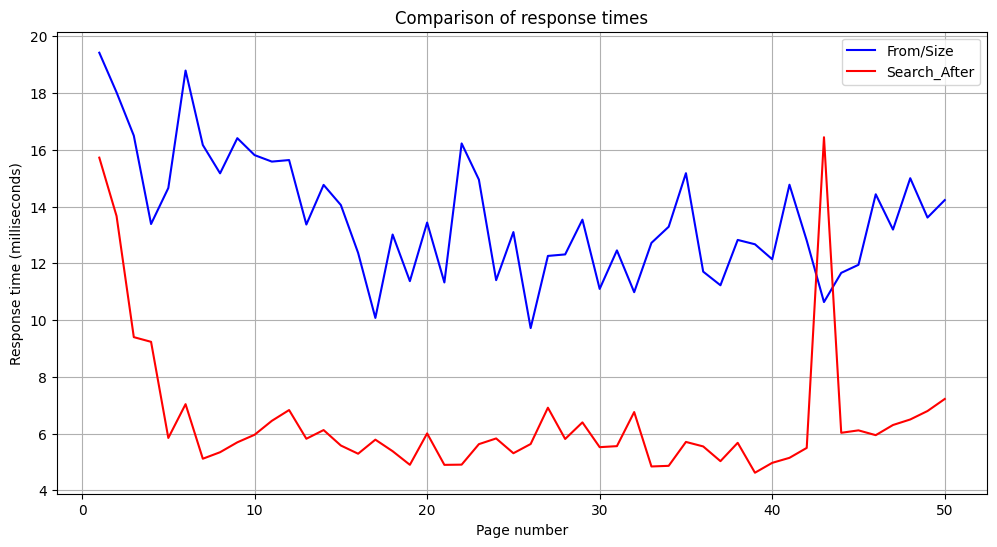

In [100]:
import matplotlib.pyplot as plt

def plot_comparison(from_size_timings, search_after_timings):
    plt.figure(figsize=(12,6))

    pages_from_size , times_from_size = zip(*from_size_timings)
    page_search_after, times_search_after = zip(*search_after_timings)

    plt.plot(pages_from_size, times_from_size,"b-", label='From/Size')
    plt.plot(page_search_after, times_search_after,"r-", label='Search_After')

    plt.xlabel("Page number")
    plt.ylabel("Response time (milliseconds)")
    plt.title("Comparison of response times")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison(from_size_timings,times_search_after)

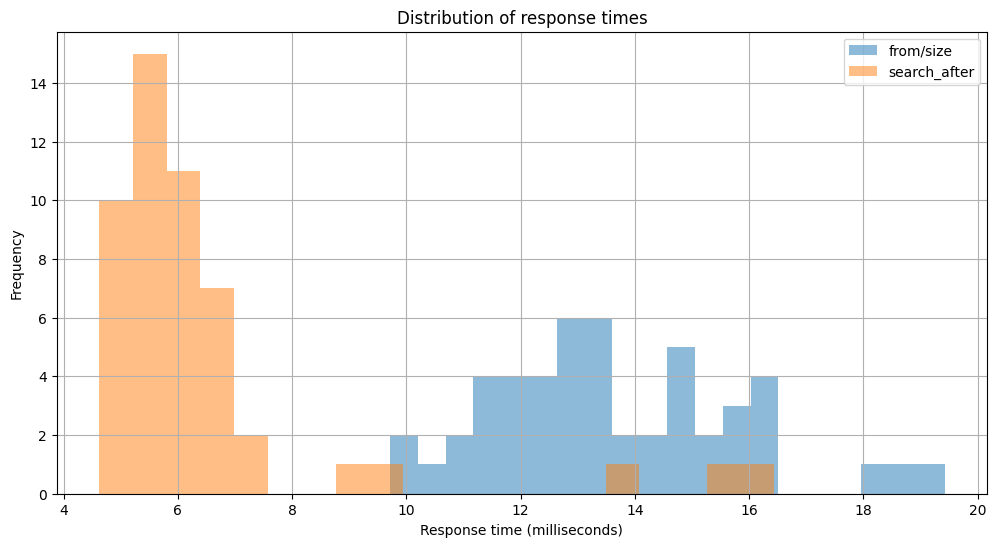

In [101]:
plt.figure(figsize=(12,6))
_, times_from_size = zip(*from_size_timings)
_, times_search_after = zip(*times_search_after)

plt.hist(times_from_size,alpha=0.5,label="from/size",bins=20)
plt.hist(times_search_after,alpha=0.5, label="search_after", bins=20)
plt.xlabel("Response time (milliseconds)")
plt.ylabel("Frequency")
plt.title("Distribution of response times")
plt.legend()
plt.grid(True)
plt.show()

In [102]:
response = es.ingest.put_pipeline(
    id='lowercase_pipeline',
    description="This pipeline transforms the text to lowercase",
    processors=[
        {
            "lowercase": {
                "field":"text"
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [103]:
response = es.ingest.get_pipeline(
    id="lowercase_pipeline"
)
pprint(response.body)

{'lowercase_pipeline': {'description': 'This pipeline transforms the text to '
                                       'lowercase',
                        'processors': [{'lowercase': {'field': 'text'}}]}}


In [104]:
response = es.ingest.delete_pipeline(id="lowercase_pipeline")
pprint(response.body)

{'acknowledged': True}


In [105]:
response = es.ingest.put_pipeline(
    id='lowercase_pipeline',
    description="This pipeline transforms the text to lowercase",
    processors=[
        {
            "lowercase": {
                "field":"text"
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [106]:
response = es.ingest.simulate(
    id="lowercase_pipeline",
    docs=[
        {
            "_index":"my_index",
            "_id": "1",
            "_source": {
                "text": "Hello World"
            }
        }
    ]
)

pprint(response.body)

{'docs': [{'doc': {'_id': '1',
                   '_index': 'my_index',
                   '_ingest': {'timestamp': '2024-12-20T06:29:30.286303289Z'},
                   '_source': {'text': 'hello world'},
                   '_version': '-3'}}]}


In [107]:
for i , document in enumerate(dummy_data):
    document['text'] = document['text'].upper()
    dummy_data[i] = document

dummy_data

[{'title': 'Sample Title 1',
  'text': 'THIS IS THE FIRST SAMPLE DOCUMENT TEXT.',
  'created_on': '2024-09-22'},
 {'title': 'Sample Title 2',
  'text': 'HERE IS ANOTHER EXAMPLE OF A DOCUMENT.',
  'created_on': '2024-09-24'},
 {'title': 'Sample Title 3',
  'text': 'THE CONTENT OF THE THIRD DOCUMENT GOES HERE.',
  'created_on': '2024-09-24'}]

In [108]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [109]:
operations = []

for document in dummy_data:
    operations.append({"index": {"_index": "my_index"}})
    operations.append(document)

response = es.bulk(operations=operations, pipeline="lowercase_pipeline")
pprint(response.body)

{'errors': False,
 'ingest_took': 9,
 'items': [{'index': {'_id': '_7_B4pMBXS9W6nXox8dS',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'AL_B4pMBXS9W6nXox8hS',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'Ab_B4pMBXS9W6nXox8hS',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0,

In [110]:
response = es.ingest.put_pipeline(
    id='pipeline_1',
    description="Pipeline with multiple transformations, handling and ignoring failures",
    processors=[
        {
            "lowercase": {
                "field": "text"
            }
        },
        {
            "set": {
                "field": "text",
                "value": "CHANGED BY PIPELINE"
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [111]:
response = es.ingest.put_pipeline(
    id="pipeline_2",
    description="Pipeline with multiple transformations, handling and ignoring failure",
    processors=[
        {
            "lowercase": {
                "field": "text",
                "on_failure": [
                    {
                        "set": {
                            "field": "text",
                            "value": "FAILED TO LOWERCASE",
                            "ignore_failure": True
                        }
                    }
                ]
            }
        },
        {
            "set": {
                "field": "new_field",
                "value": "ADD BY PIPELINE",
                "ignore_failure": True
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [112]:
document = {
    "title": "Sample Title 4",
    "created_on": "2024-09-25"
}

response = es.index(
    index="my_index",
    pipeline="pipeline_2",
    document=document
)

pprint(response.body)

{'_id': 'Ar_B4pMBXS9W6nXox8i-',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 3,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [113]:
response = es.search(
    index="my_index"
)

hits = response.body['hits']['hits']
for hit in hits:
    print(hit['_source'])

In [114]:
document = {
    "price": "100.50",
    "old_name": "old_value",
    "description": "<p>This is a description with HTML.</p>",
    "username": "UserNAME",
    "category": "books",
    "title": "   Example Title with Whitespace   ",
    "tags": "tag1,tag2,tag3",
    "temporary_field": "This field should be removed"
}

In [115]:
pipeline_body = {
    "description": "Pipeline to demonstrate various ingest processors",
    "processors":[
        {
            "convert": {
                "field": "price",
                "type": "float",
                "ignore_missing":True
            }
        },
        {
            "rename":{
                "field": "old_name",
                "target_field": "new_name"
            }
        },
        {
            "set":{
                "field": "status",
                "value": "active"
            }
        },
        {
            "html_strip": {
                "field": "description"
            }
        },
        {
            "lowercase": {
                "field":"username"
            }
        },
        {
            "uppercase": {
                "field": "category"
            }
        },
        {
            "trim": {
                "field": "title"
            }
        },
        {
            "split": {
                "field": "tags",
                "separator": ","
            }
        },
        {
            "remove":{
                "field": "temporary_field"
            }
        },
        {
            "append":{
                "field": "tags",
                "value": ["new_tag"]
            }
        }
    ]
}

pipeline_id  = "multi_steps_pipeline"
es.ingest.put_pipeline(id=pipeline_id, body=pipeline_body)


ObjectApiResponse({'acknowledged': True})

In [116]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

response = es.index(index="my_index", document=document,pipeline=pipeline_id)
pprint(response.body)

{'_id': 'A7_B4pMBXS9W6nXoycgP',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 0,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [117]:
response = es.search(index="my_index")
hits = response.body['hits']['hits']

for hit in hits:
    pprint(hit['_source'])

In [118]:
clothes_documents=[
  { "brand": "gucci", "color": "red", "model": "model_1" },
  { "brand": "gucci", "color": "blue", "model": "model_2" },
  { "brand": "gucci", "color": "red", "model": "model_3" },
  { "brand": "gucci", "color": "green", "model": "model_4" },
  { "brand": "gucci", "color": "red", "model": "model_1" },
  { "brand": "gucci", "color": "yellow", "model": "model_2" },
  { "brand": "nike", "color": "red", "model": "model_5" },
  { "brand": "nike", "color": "blue", "model": "model_6" },
  { "brand": "gucci", "color": "blue", "model": "model_3" },
  { "brand": "gucci", "color": "red", "model": "model_4" },
  { "brand": "nike", "color": "red", "model": "model_7" },
  { "brand": "nike", "color": "green", "model": "model_8" },
  { "brand": "gucci", "color": "red", "model": "model_1" },
  { "brand": "adidas", "color": "blue", "model": "model_9" },
  { "brand": "adidas", "color": "red", "model": "model_10" },
  { "brand": "puma", "color": "yellow", "model": "model_11" },
  { "brand": "puma", "color": "red", "model": "model_12" },
  { "brand": "nike", "color": "blue", "model": "model_13" },
  { "brand": "nike", "color": "green", "model": "model_14" },
  { "brand": "adidas", "color": "yellow", "model": "model_15" },
  { "brand": "gucci", "color": "blue", "model": "model_16" },
  { "brand": "gucci", "color": "red", "model": "model_2" },
  { "brand": "adidas", "color": "green", "model": "model_17" },
  { "brand": "puma", "color": "blue", "model": "model_18" },
  { "brand": "nike", "color": "yellow", "model": "model_5" },
  { "brand": "nike", "color": "red", "model": "model_6" },
  { "brand": "adidas", "color": "yellow", "model": "model_8" },
  { "brand": "puma", "color": "red", "model": "model_7" },
  { "brand": "gucci", "color": "green", "model": "model_19" },
  { "brand": "gucci", "color": "blue", "model": "model_20" },
  { "brand": "adidas", "color": "yellow", "model": "model_21" },
  { "brand": "puma", "color": "blue", "model": "model_22" },
  { "brand": "nike", "color": "red", "model": "model_23" },
  { "brand": "gucci", "color": "yellow", "model": "model_24" },
  { "brand": "adidas", "color": "green", "model": "model_25" },
  { "brand": "puma", "color": "red", "model": "model_26" },
  { "brand": "nike", "color": "blue", "model": "model_27" },
  { "brand": "gucci", "color": "red", "model": "model_28" },
  { "brand": "adidas", "color": "yellow", "model": "model_29" },
  { "brand": "puma", "color": "green", "model": "model_30" },
  { "brand": "nike", "color": "red", "model": "model_1" },
  { "brand": "gucci", "color": "blue", "model": "model_2" },
  { "brand": "adidas", "color": "red", "model": "model_3" },
  { "brand": "puma", "color": "yellow", "model": "model_4" },
  { "brand": "nike", "color": "blue", "model": "model_5" },
  { "brand": "gucci", "color": "red", "model": "model_6" },
  { "brand": "adidas", "color": "green", "model": "model_7" },
  { "brand": "puma", "color": "blue", "model": "model_8" },
  { "brand": "nike", "color": "yellow", "model": "model_9" },
  { "brand": "gucci", "color": "green", "model": "model_10" },
  { "brand": "adidas", "color": "blue", "model": "model_11" },
  { "brand": "puma", "color": "red", "model": "model_12" },
  { "brand": "nike", "color": "yellow", "model": "model_13" },
  { "brand": "gucci", "color": "red", "model": "model_14" },
  { "brand": "adidas", "color": "green", "model": "model_15" },
  { "brand": "puma", "color": "yellow", "model": "model_16" },
  { "brand": "nike", "color": "red", "model": "model_17" },
  { "brand": "gucci", "color": "blue", "model": "model_18" },
  { "brand": "adidas", "color": "yellow", "model": "model_19" },
  { "brand": "puma", "color": "green", "model": "model_20" },
  { "brand": "nike", "color": "red", "model": "model_21" },
  { "brand": "gucci", "color": "yellow", "model": "model_22" },
  { "brand": "adidas", "color": "blue", "model": "model_23" },
  { "brand": "puma", "color": "red", "model": "model_24" },
  { "brand": "nike", "color": "green", "model": "model_25" },
  { "brand": "gucci", "color": "red", "model": "model_26" },
  { "brand": "adidas", "color": "blue", "model": "model_27" },
  { "brand": "puma", "color": "yellow", "model": "model_28" },
  { "brand": "nike", "color": "red", "model": "model_29" },
  { "brand": "gucci", "color": "green", "model": "model_30" },
  { "brand": "adidas", "color": "blue", "model": "model_1" },
  { "brand": "puma", "color": "red", "model": "model_2" },
  { "brand": "nike", "color": "yellow", "model": "model_3" },
  { "brand": "gucci", "color": "blue", "model": "model_4" },
  { "brand": "adidas", "color": "red", "model": "model_5" },
  { "brand": "puma", "color": "yellow", "model": "model_6" },
  { "brand": "nike", "color": "green", "model": "model_7" },
  { "brand": "gucci", "color": "red", "model": "model_8" },
  { "brand": "adidas", "color": "blue", "model": "model_9" },
  { "brand": "puma", "color": "yellow", "model": "model_10" },
  { "brand": "nike", "color": "red", "model": "model_11" },
  { "brand": "gucci", "color": "green", "model": "model_12" },
  { "brand": "adidas", "color": "blue", "model": "model_13" },
  { "brand": "puma", "color": "red", "model": "model_14" },
  { "brand": "nike", "color": "yellow", "model": "model_15" },
  { "brand": "gucci", "color": "red", "model": "model_16" },
  { "brand": "adidas", "color": "green", "model": "model_17" },
  { "brand": "puma", "color": "blue", "model": "model_18" },
  { "brand": "nike", "color": "red", "model": "model_19" },
  { "brand": "gucci", "color": "yellow", "model": "model_20" },
  { "brand": "adidas", "color": "blue", "model": "model_21" },
  { "brand": "puma", "color": "green", "model": "model_22" },
  { "brand": "nike", "color": "red", "model": "model_23" },
  { "brand": "gucci", "color": "blue", "model": "model_24" },
  { "brand": "adidas", "color": "yellow", "model": "model_25" },
  { "brand": "puma", "color": "red", "model": "model_26" },
  { "brand": "nike", "color": "blue", "model": "model_27" },
  { "brand": "gucci", "color": "green", "model": "model_28" },
  { "brand": "adidas", "color": "red", "model": "model_29" },
  { "brand": "puma", "color": "yellow", "model": "model_30" }
]

In [119]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

operations = []
for document in clothes_documents:
    operations.append({"index":{"_index":"my_index"}})
    operations.append(document)

response = es.bulk(operations=operations)
pprint(response.body)

{'errors': False,
 'items': [{'index': {'_id': 'BL_B4pMBXS9W6nXoyshH',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'Bb_B4pMBXS9W6nXoyshH',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'Br_B4pMBXS9W6nXoyshH',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, '

In [120]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "bool":{
                "filter": [
                    {
                        "term":{
                            "brand":"gucci"
                        }
                    }
                ]
            }
        },
        "aggs":{
            "colors":{
                "terms":{
                    "field":"color.keyword"
                }
            },
            "color_red":{
                "filter":{
                    "term":{
                        "color.keyword": "red"
                    }
                },
                "aggs":{
                    "models":{
                        "terms":{
                            "field":"model.keyword"
                        }
                    }
                }
            }
        },
        "post_filter":{
            "term":{
                "color":"red"
            }
        },
        "size":20
    }
)

hits = response.body['hits']['hits']
pprint(f"Found {len(hits)} documents")

'Found 0 documents'


In [121]:
response.body['aggregations']['color_red']['models']['buckets']

[]

In [122]:
response.body['aggregations']['colors']['buckets']

[]

In [123]:
query = {
    "query": "SELECT model FROM my_index ORDER BY brand LIMIT 5"
}

response = es.sql.query(body=query)
for row in response['rows']:
    print(row)

In [124]:
query = {
    "query": "SELECT * FROM my_index"
}

response = es.sql.query(body=query, format="txt")
pprint(response.body)

('     brand     |     color     |     model     \n'
 '---------------+---------------+---------------\n')


In [125]:
query = {
    "query": "SELECT * FROM my_index ORDER BY color DESC LIMIT 5",
    "filter":{
        "term": {"brand.keyword": "gucci"}
    }
}

response = es.sql.query(
    body=query,
    format="txt",
    
)
pprint(response.body)

('     brand     |     color     |     model     \n'
 '---------------+---------------+---------------\n')


In [126]:
translate_query = {
    "query": "SELECT * FROM my_index WHERE color LIKE '%red%' ORDER BY brand DESC LIMIT 10",
}

translate_query = es.sql.translate(body=translate_query)
pprint(translate_query.body)

{'_source': False,
 'fields': [{'field': 'brand'}, {'field': 'color'}, {'field': 'model'}],
 'query': {'wildcard': {'color.keyword': {'boost': 1.0, 'wildcard': '*red*'}}},
 'size': 10,
 'sort': [{'brand.keyword': {'missing': '_first',
                             'order': 'desc',
                             'unmapped_type': 'keyword'}}],
 'track_total_hits': -1}


In [127]:
policy = {
    "phases":{
        "hot":{
            "actions":{
                "rollover":{
                    "max_age":"5m"
                }
            }
        },
        "delete":{
            "min_age":"20m",
            "actions":{
                "delete":{}
            }
        }
    }
}

response = es.ilm.put_lifecycle(name="cpu_usage_policy_2", policy=policy)
print(response.body)

{'acknowledged': True}


In [128]:
es.indices.delete(index="cpu_usage_template",ignore_unavailable=True)
es.indices.create(index="cpu_usage_template")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'cpu_usage_template'})

In [129]:
es.indices.delete_index_template(name="cpu_usage_template")
response = es.indices.put_index_template(
    name="cpu_usage_template",
    index_patterns=[
        "cpu_example_template*",
    ],
    data_stream={},
    template={
        "settings": {
            "index.mode":"time_series",
            "index.lifecycle.name": "cpu_usage_policy_2"
        },
        "mappings": {
            "properties": {
                "@timestamp":{
                    "type":"date"
                },
                "cpu_usage":{
                    "type":"float",
                    "time_series_metric": "gauge"
                },
                "cpu_name":{
                    "type":"keyword",
                    "time_series_dimension": True
                }
            }
        }
    },
    priority=200,
    meta={
        "description": "Template for CPU usage data"
    },
    allow_auto_create=True
)
pprint(response.body)

{'acknowledged': True}


In [130]:
count = es.count(index="cpu_usage_template")
pprint(count.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'count': 0}


In [131]:
response = es.search(
    index="cpu_example_template",
    body={
        "query": {
            "match_all": {}
        },
        "size":1000
    }
)

hits = response.body['hits']['hits']

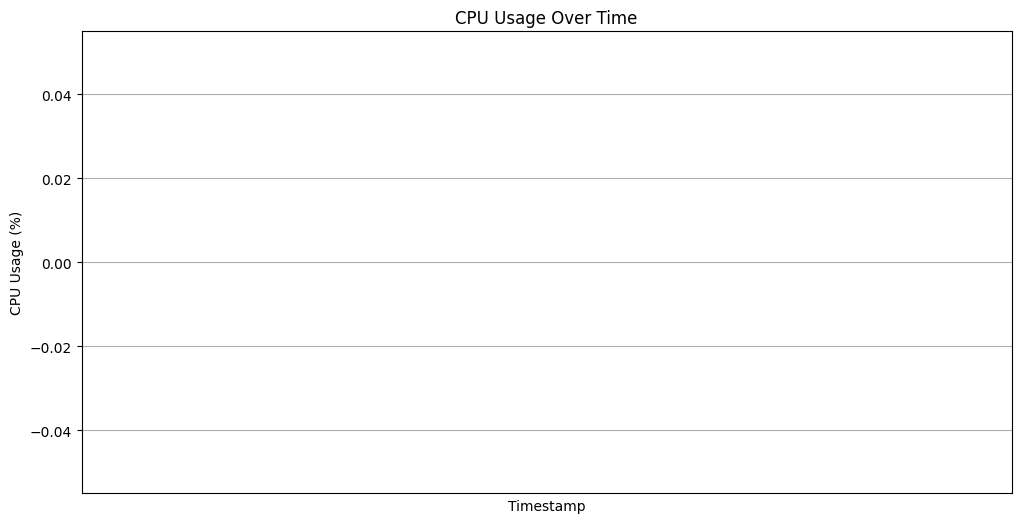

In [132]:
import matplotlib.pyplot as plt

cpu_usage_values = [hit["_source"]["cpu_usage"] for hit in hits]
timestamp_values = [hit["_source"]["@timestamp"] for hit in hits]

plt.figure(figsize=(12,6))
plt.plot(timestamp_values, cpu_usage_values)
plt.xticks([])
plt.xlabel("Timestamp")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Over Time")
plt.grid(True)
plt.show()

In [133]:
response = es.search(
    index="cpu_example_templates",
    body={
        "aggs":{
            "avg_cpu_usage":{
                "avg": {
                    "field": "cpu_usage"
                }
            }
        }
    }
)

pprint(f"Average CPU usage: {response.body['aggregations']['avg_cpu_usage']['value']}%")

'Average CPU usage: 4.650533107353776%'


In [134]:
response = es.search(
    index="cpu_example_template",
    body={
        "aggs":{
            "max_cpu_usage":{
                "max": {
                    "field": "cpu_usage"
                }
            }
        }
    }
)

pprint(f"Max time CPU usage: {response.body['aggregations']['max_cpu_usage']['value']}s")

'Max time CPU usage: Nones'


In [135]:
response = es.indices.get_data_stream()
pprint(response.body)

{'data_streams': [{'_meta': {'description': 'Template for CPU usage data'},
                   'allow_custom_routing': False,
                   'generation': 1,
                   'hidden': False,
                   'ilm_policy': 'cpu_usage_policy_2',
                   'indices': [{'ilm_policy': 'cpu_usage_policy_2',
                                'index_name': '.ds-cpu_example_template-2024.12.19-000001',
                                'index_uuid': '5Hy2wUsdQsKbQKxyTUzXWA',
                                'managed_by': 'Index Lifecycle Management',
                                'prefer_ilm': True}],
                   'name': 'cpu_example_template',
                   'next_generation_managed_by': 'Index Lifecycle Management',
                   'prefer_ilm': True,
                   'replicated': False,
                   'rollover_on_write': False,
                   'status': 'YELLOW',
                   'system': False,
                   'template': 'cpu_example_template',

In [136]:
ilm_status = es.ilm.get_lifecycle(name="cpu_usage_policy_2")
pprint(ilm_status.body)

{'cpu_usage_policy_2': {'in_use_by': {'composable_templates': ['cpu_usage_template',
                                                               'cpu_example_template'],
                                      'data_streams': ['cpu_example_template'],
                                      'indices': ['.ds-cpu_example_template-2024.12.19-000001']},
                        'modified_date': '2024-12-19T08:14:10.820Z',
                        'policy': {'phases': {'delete': {'actions': {'delete': {'delete_searchable_snapshot': True}},
                                                         'min_age': '20m'},
                                              'hot': {'actions': {'rollover': {'max_age': '5m'}},
                                                      'min_age': '0ms'}}},
                        'version': 1}}


In [137]:
response = es.ilm.explain_lifecycle(
    index=".ds-cpu_example_template-2024.12.19-000001"
)
pprint(response.body)

{'indices': {'.ds-cpu_example_template-2024.12.19-000001': {'action': 'rollover',
                                                            'action_time_millis': 1734606678257,
                                                            'age': '19.3h',
                                                            'index': '.ds-cpu_example_template-2024.12.19-000001',
                                                            'index_creation_date_millis': 1734606677581,
                                                            'lifecycle_date_millis': 1734606677581,
                                                            'managed': True,
                                                            'phase': 'hot',
                                                            'phase_execution': {'modified_date_in_millis': 1734596050820,
                                                                                'phase_definition': {'actions': {'rollover': {'max_age': '5m',
       

In [138]:
response = es.indices.analyze(
    char_filter=[
        "html_strip"
    ],
    text="I&apos;m so happy</>!</p>"
 )

pprint(response.body)

{'tokens': [{'end_offset': 25,
             'position': 0,
             'start_offset': 0,
             'token': "I'm so happy</>!\n",
             'type': 'word'}]}


In [139]:
response = es.indices.analyze(
    tokenizer="keyword",
    char_filter=[
        {
            "type": "mapping",
            "mappings": [
                "٠ => 0",
                "١ => 1",
                "٢ => 2",
                "٣ => 3",
                "٤ => 4",
                "٥ => 5",
                "٦ => 6",
                "٧ => 7",
                "٨ => 8",
                "٩ => 9"
            ]
        }
    ],
    text="I saw comet Tsuchinshan Atlas in ٢٠٢٤",
)
pprint(response.body)

{'tokens': [{'end_offset': 37,
             'position': 0,
             'start_offset': 0,
             'token': 'I saw comet Tsuchinshan Atlas in 2024',
             'type': 'word'}]}


In [140]:
response = es.indices.analyze(
    tokenizer="lowercase",
    text="The 2 QUICK Brown-Foxes jumped over the 3 lazy dog's",
)

tokens = response.body["tokens"]
for token in tokens:
    print(f"Token: {token['token']}, Type: {token['type']}")

Token: the, Type: word
Token: quick, Type: word
Token: brown, Type: word
Token: foxes, Type: word
Token: jumped, Type: word
Token: over, Type: word
Token: the, Type: word
Token: lazy, Type: word
Token: dog, Type: word
Token: s, Type: word


In [141]:
response = es.indices.analyze(
    tokenizer="standard",
    filter=["apostrophe"],
    text="The 2 QUICK Brown-Foxes jumped over the 3 lazy dog's",
)

tokens = response.body["tokens"]
for token in tokens:
    print(f"Token: {token['token']}, Type: {token['type']}")

Token: The, Type: <ALPHANUM>
Token: 2, Type: <NUM>
Token: QUICK, Type: <ALPHANUM>
Token: Brown, Type: <ALPHANUM>
Token: Foxes, Type: <ALPHANUM>
Token: jumped, Type: <ALPHANUM>
Token: over, Type: <ALPHANUM>
Token: the, Type: <ALPHANUM>
Token: 3, Type: <NUM>
Token: lazy, Type: <ALPHANUM>
Token: dog, Type: <ALPHANUM>


In [142]:
response = es.indices.analyze(
    tokenizer="standard",
    filter=[
        "decimal_digit"
    ],
    text="I saw comet Tsuchinshan Atlas in ٢٠٢٤"
)

tokens = response.body['tokens']

for token in tokens:
    print(f"Token: {token['token']}")

Token: I
Token: saw
Token: comet
Token: Tsuchinshan
Token: Atlas
Token: in
Token: 2024


In [143]:
response = es.indices.analyze(
    analyzer="standard",
    text="I saw comet Tsuchinshan Atlas in ٢٠٢٤",

)

tokens = response.body['tokens']
for token in tokens:
    print(f"Token: {token['token']}")

Token: i
Token: saw
Token: comet
Token: tsuchinshan
Token: atlas
Token: in
Token: ٢٠٢٤


In [144]:
response = es.indices.analyze(
    analyzer="stop",
    text="I saw comet Tsuchinshan Atlas in ٢٠٢٤",

)

tokens = response.body['tokens']
for token in tokens:
    print(f"Token: {token['token']}")

Token: i
Token: saw
Token: comet
Token: tsuchinshan
Token: atlas


In [145]:
response = es.indices.analyze(
    analyzer="keyword",
    text="I saw comet Tsuchinshan Atlas in ٢٠٢٤"
)

tokens = response.body['tokens']
for token in tokens:
    print(f"Token : {token['token']}")

Token : I saw comet Tsuchinshan Atlas in ٢٠٢٤


In [146]:
index_name = "index_time_example"
settings = {
    "settings":{
        "analysis":{
            "char_filter":{
                "ampersand_replacement":{
                    "type":"mapping",
                    "mappings":["& => and"]
                }
            },
            "analyzer":{
                "custom_index_analyzer":{
                    "type":"custom",
                    "char_filter":["html_strip","ampersand_replacement"],
                    "tokenizer":"standard",
                    "filter":["lowercase"]
                }
            }
        }
    },
    "mappings":{
        "properties":{
            "content":{
                "type":"text",
                "analyzer":"custom_index_analyzer"
            }
        }
    }
}

es.indices.delete(index=index_name,ignore_unavailable=True)
es.indices.create(index=index_name,body=settings)

document = {
    "content": "Visit my website https://myuniversehub.com/ & like some images!"
}

response = es.index(index=index_name, id=1, document=document)
pprint(response.body)

{'_id': '1',
 '_index': 'index_time_example',
 '_primary_term': 1,
 '_seq_no': 0,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [147]:
response = es.search(index=index_name, body={"query": {"match_all": {}}})
hits = response.body['hits']['hits']

for hit in hits:
    print(hit['_source'])

In [148]:
response = es.indices.analyze(
    index=index_name,
    body={
        "field":"content",
        "text":"Visit my website https://myuniversehub.com/ & like some images!"
    }
)

tokens = response.body['tokens']
for token in tokens:
    print(f"Token: {token['token']}")

Token: visit
Token: my
Token: website
Token: https
Token: myuniversehub.com
Token: and
Token: like
Token: some
Token: images


In [149]:
response = es.search(index=index_name, body={
    "query":{
        "match": {
            "content":{
                "query":"myuniversehub.com",
                "analyzer":"standard" 
            }
        }
    }
})

hits = response["hits"]["hits"]
for hit in hits:
    print(hit["_source"])

{'content': 'Visit my website https://myuniversehub.com/ & like some images!'}


In [152]:
response = es.search(index=index_name, body={
    "query":{
        "term": {
            "content":{
                "value":"myuniversehub.com",
            }
        }
    }
})

hits = response["hits"]["hits"]
for hit in hits:
    print(hit["_source"])

{'content': 'Visit my website https://myuniversehub.com/ & like some images!'}


In [153]:
from pprint import pprint


settings = {
    "settings": {
        "analysis": {
            "filter": {
                "synonym_filter": {
                    "type": "synonym",
                    "synonyms": [
                        "car, automobile, vehicle",
                        "tv, television",
                        "smartphone, mobile, cell phone",
                        "jupyter, jupyter notebook, jupyterlab",
                        "jupiter, mars, earth, venus, mercury, saturn, uranus, neptune => planet"
                    ]
                }
            },
            "analyzer": {
                "synonym_analyzer": {
                    "tokenizer": "standard",
                    "filter": [
                        "lowercase",
                        "synonym_filter"
                    ]
                }
            }
        }
    },
    "mappings": {
        "properties": {
            "description": {
                "type": "text",
                "analyzer": "synonym_analyzer"
            }
        }
    }
}

index_name = "my_synonym_index"
es.indices.delete(index=index_name,ignore_unavailable=True)
es.indices.create(index=index_name, body=settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_synonym_index'})

In [154]:
dummy_data=[
  {
    "description": "I love my car and television."
  },
  {
    "description": "My smartphone is amazing."
  },
  {
    "description": "I love working with Jupyter notebooks."
  },
  {
    "description": "I want to go to Mars."
  },
  {
    "description": "I want to go to Venus."
  }
]

In [155]:
operations=[]
for document in tqdm(dummy_data, total=len(dummy_data)):
    operations.append({"index":{"_index":index_name}})
    operations.append(document)

response = es.bulk(operations=operations)
pprint(response.body)

100%|██████████| 5/5 [00:00<00:00, 58254.22it/s]

{'errors': False,
 'items': [{'index': {'_id': 'aL_t4pMBXS9W6nXojcjy',
                      '_index': 'my_synonym_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'ab_t4pMBXS9W6nXojcjy',
                      '_index': 'my_synonym_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'ar_t4pMBXS9W6nXojcjy',
                      '_index': 'my_synonym_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed

In [156]:
response = es.search(index=index_name,body={
    "query":{
        "match":{
            "description":"planet"
        }
    }
})

for hit in response['hits']['hits']:
    print(hit['_source'])

{'description': 'I want to go to Mars.'}
{'description': 'I want to go to Venus.'}


In [157]:
settings = {
    "settings": {
        "analysis": {
            "filter": {
                "synonym_filter": {
                    "type": "synonym",
                    "synonyms": [
                        "car, automobile, vehicle",
                        "tv, television",
                        "smartphone, mobile, cell phone",
                        "jupyter, jupyter notebook, jupyterlab",
                        "jupiter, mars, earth, venus, mercury, saturn, uranus, neptune => planet"
                    ]
                }
            },
            "analyzer": {
                "index_analyzer": {
                    "tokenizer": "standard",
                    "filter": [
                        "lowercase"
                    ]
                },
                "search_analyzer":{
                    "tokenizer":"standard",
                    "filter": ["lowercase", "synonym_filter"]
                }
            }
        }
    },
    "mappings": {
        "properties": {
            "description": {
                "type": "text",
                "analyzer": "index_analyzer",
                "search_analyzer":"search_analyzer"
            }
        }
    }
}

es.indices.delete(index=index_name, ignore_unavailable=True)
es.indices.create(index=index_name, body=settings)


ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_synonym_index'})

In [159]:
response=es.bulk(operations=operations)
pprint(response.body)

{'errors': False,
 'items': [{'index': {'_id': 'cr8D45MBXS9W6nXo8Mgh',
                      '_index': 'my_synonym_index',
                      '_primary_term': 1,
                      '_seq_no': 5,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'c78D45MBXS9W6nXo8Mgi',
                      '_index': 'my_synonym_index',
                      '_primary_term': 1,
                      '_seq_no': 6,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'dL8D45MBXS9W6nXo8Mgi',
                      '_index': 'my_synonym_index',
                      '_primary_term': 1,
                      '_seq_no': 7,
                      '_shards': {'failed

In [160]:
query = {
    "query":{
        "match": {
            "description":"vehicle"
        }
    }
}

response = es.search(index=index_name, body=query)

for hit in response['hits']['hits']:
    print(hit['_source'])

{'description': 'I love my car and television.'}
{'description': 'I love my car and television.'}


In [164]:
response = es.cluster.stats(human=True)
pprint(response.body['nodes']['jvm'])

{'max_uptime': '1.9h',
 'max_uptime_in_millis': 7018200,
 'mem': {'heap_max': '7.7gb',
         'heap_max_in_bytes': 8292139008,
         'heap_used': '775.2mb',
         'heap_used_in_bytes': 812901928},
 'threads': 95,
 'versions': [{'bundled_jdk': True,
               'count': 1,
               'using_bundled_jdk': True,
               'version': '22.0.1',
               'vm_name': 'OpenJDK 64-Bit Server VM',
               'vm_vendor': 'Oracle Corporation',
               'vm_version': '22.0.1+8-16'}]}


In [165]:
dummy_data=[
  {
    "title": "Sample Title 1",
    "text": "This is the first sample document text.",
    "created_on": "2024-09-22"
  },
  {
    "title": "Sample Title 2",
    "text": "Here is another example of a document.",
    "created_on": "2024-09-24"
  },
  {
    "title": "Sample Title 3",
    "text": "The content of the third document goes here.",
    "created_on": "2024-09-24"
  }
]

In [166]:
operations=[]
for document in tqdm(dummy_data, total=len(dummy_data)):
    operations.append({"index":{"_index":"my_index"}})
    operations.append(document)

es.bulk(operations=operations)

100%|██████████| 3/3 [00:00<00:00, 30102.66it/s]


ObjectApiResponse({'errors': False, 'took': 9090592, 'items': [{'index': {'_index': 'my_index', '_id': 'd78v45MBXS9W6nXomMhq', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 100, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'eL8v45MBXS9W6nXomMhq', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 101, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'eb8v45MBXS9W6nXomMhq', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 102, '_primary_term': 1, 'status': 201}}]})

In [167]:
response = es.search(
    index="my_index",
    body={
        "query":{
            "range":{
                "created_on":{
                    "gte":"2024-09-22||+1d/d",
                    "lte":"now/d"
                }
            }
        }
    }
)

pprint(f"Found {len(response['hits']['hits'])}")

'Found 2'


In [169]:
response = es.search(
    index="my_index",
    body={
        "query":{
            "match_all": {}
        }
    }, filter_path="hits.hits._id,hits.hits._source"
)

pprint(response.body)

{'hits': {'hits': [{'_id': 'BL_B4pMBXS9W6nXoyshH',
                    '_source': {'brand': 'gucci',
                                'color': 'red',
                                'model': 'model_1'}},
                   {'_id': 'Bb_B4pMBXS9W6nXoyshH',
                    '_source': {'brand': 'gucci',
                                'color': 'blue',
                                'model': 'model_2'}},
                   {'_id': 'Br_B4pMBXS9W6nXoyshH',
                    '_source': {'brand': 'gucci',
                                'color': 'red',
                                'model': 'model_3'}},
                   {'_id': 'B7_B4pMBXS9W6nXoyshH',
                    '_source': {'brand': 'gucci',
                                'color': 'green',
                                'model': 'model_4'}},
                   {'_id': 'CL_B4pMBXS9W6nXoyshH',
                    '_source': {'brand': 'gucci',
                                'color': 'red',
                                'mod

In [170]:
response = es.search(
    index="my_index",
    body={
        "query":{
            "match_all": {}
        }
    }, filter_path="hits.hits._id,-hits.hits._source"
)

pprint(response.body)

{'hits': {'hits': [{'_id': 'BL_B4pMBXS9W6nXoyshH'},
                   {'_id': 'Bb_B4pMBXS9W6nXoyshH'},
                   {'_id': 'Br_B4pMBXS9W6nXoyshH'},
                   {'_id': 'B7_B4pMBXS9W6nXoyshH'},
                   {'_id': 'CL_B4pMBXS9W6nXoyshH'},
                   {'_id': 'Cb_B4pMBXS9W6nXoyshH'},
                   {'_id': 'Cr_B4pMBXS9W6nXoyshH'},
                   {'_id': 'C7_B4pMBXS9W6nXoyshH'},
                   {'_id': 'DL_B4pMBXS9W6nXoyshH'},
                   {'_id': 'Db_B4pMBXS9W6nXoyshH'}]}}


In [171]:
response = es.indices.get_settings(
    index="my_index"
)

pprint(response.body)

{'my_index': {'settings': {'index': {'creation_date': '1734676171169',
                                     'number_of_replicas': '1',
                                     'number_of_shards': '1',
                                     'provided_name': 'my_index',
                                     'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}},
                                     'uuid': 'mUONmlfFQa2uZuc_iFy6lw',
                                     'version': {'created': '8512000'}}}}}


In [172]:
response = es.indices.get_settings(
    index="my_index",
    flat_settings=True
)

pprint(response.body)

{'my_index': {'settings': {'index.creation_date': '1734676171169',
                           'index.number_of_replicas': '1',
                           'index.number_of_shards': '1',
                           'index.provided_name': 'my_index',
                           'index.routing.allocation.include._tier_preference': 'data_content',
                           'index.uuid': 'mUONmlfFQa2uZuc_iFy6lw',
                           'index.version.created': '8512000'}}}
